In [17]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from matplotlib import rc, rcParams

%matplotlib inline

rc('text', usetex=True)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 14}
rc('font', **font)
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

ipykernel_launcher:15: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


In [18]:
model_vals = []
solver_vals = []
loss_vals = []
overall_scores_rows = []
columns = None

for results_file in pathlib.Path('./eval').rglob('eval_results.csv'):
    model_dir = results_file.parent.parent
    solver_dir = model_dir.parent
    loss_dir = solver_dir.parent

    model = model_dir.stem
    solver = solver_dir.stem
    loss = loss_dir.stem

    model_vals.append(model)
    solver_vals.append(solver)
    loss_vals.append(loss)

    df = pd.read_csv(str(results_file), index_col=0)
    columns = df.columns
    overall_scores = df.iloc[-1]
    overall_scores_rows.append(overall_scores)

df_orig = pd.DataFrame(overall_scores_rows, columns=columns)
df_orig.insert(0, 'model', model_vals)
df_orig.insert(1, 'solver', solver_vals)
df_orig.insert(2, 'loss', loss_vals)
df_orig.reset_index(drop=True, inplace=True)
df_orig

,model,solver,loss,num_frames,num_matches,num_switches,num_false_positives,num_misses,num_objects,num_predictions,num_fragmentations,mostly_tracked,partially_tracked,precision,recall,idf1,mota,motp
0,0030000,fNMS,contr,56334.0,421688.0,1278.0,22354.0,127767.0,550733.0,445320.0,1740.0,1607.0,417.0,0.949802,0.768006,0.777194,0.725095,0.143368
1,0040000,fNMS,contr,56334.0,429600.0,1305.0,20884.0,119828.0,550733.0,451789.0,1871.0,1620.0,412.0,0.953775,0.782421,0.778750,0.742131,0.136843
2,0050000,fNMS,contr,56334.0,432488.0,1451.0,24704.0,116794.0,550733.0,458643.0,2090.0,1668.0,403.0,0.946137,0.787930,0.785957,0.740439,0.137775
3,0060000,fNMS,contr,56334.0,432330.0,1521.0,23628.0,116882.0,550733.0,457479.0,2117.0,1657.0,411.0,0.948352,0.787770,0.781278,0.742106,0.137035
4,0070000,fNMS,contr,56334.0,435949.0,1387.0,24751.0,113397.0,550733.0,462087.0,2217.0,1659.0,430.0,0.946436,0.794098,0.783952,0.746638,0.139240
5,0080000,fNMS,contr,56334.0,435380.0,1443.0,25020.0,113910.0,550733.0,461843.0,2197.0,1661.0,423.0,0.945826,0.793167,0.784455,0.745116,0.136379
6,0090000,fNMS,contr,56334.0,433598.0,1436.0,24330.0,115699.0,550733.0,459364.0,2253.0,1654.0,424.0,0.947035,0.789918,0.784398,0.743133,0.136745
7,0030000,orig,contr,56334.0,422712.0,1095.0,20326.0,126926.0,550733.0,444133.0,1764.0,1605.0,416.0,0.954234,0.769533,0.786765,0.730637,0.143688
8,0040000,orig,contr,56334.0,429698.0,1105.0,18279.0,119930.0,550733.0,449082.0,1950.0,1624.0,410.0,0.959297,0.782236,0.793373,0.747039,0.136874
9,0050000,orig,contr,56334.0,432741.0,1164.0,23339.0,116828.0,550733.0,457244.0,2101.0,1669.0,402.0,0.948957,0.787868,0.793963,0.743377,0.137837


In [24]:
df_orig_sub = df_orig[df_orig['model'] == '0040000']
df_orig_sub

,model,solver,loss,num_frames,num_matches,num_switches,num_false_positives,num_misses,num_objects,num_predictions,num_fragmentations,mostly_tracked,partially_tracked,precision,recall,idf1,mota,motp
1,0040000,fNMS,contr,56334.0,429600.0,1305.0,20884.0,119828.0,550733.0,451789.0,1871.0,1620.0,412.0,0.953775,0.782421,0.778750,0.742131,0.136843
8,0040000,orig,contr,56334.0,429698.0,1105.0,18279.0,119930.0,550733.0,449082.0,1950.0,1624.0,410.0,0.959297,0.782236,0.793373,0.747039,0.136874
15,0040000,orig,none,56334.0,452302.0,800.0,25732.0,97631.0,550733.0,478834.0,1574.0,1745.0,380.0,0.946261,0.822725,0.810694,0.774550,0.144850
22,0040000,fNMS,tripl,56334.0,451791.0,1123.0,29471.0,97819.0,550733.0,482385.0,1961.0,1742.0,388.0,0.938906,0.822384,0.792454,0.766833,0.151824
29,0040000,orig,tripl,56334.0,452560.0,1345.0,31079.0,96828.0,550733.0,484984.0,2012.0,1744.0,385.0,0.935917,0.824183,0.794283,0.765309,0.152342


In [20]:
df = df_orig[
    (df_orig['model'] == '0030000') |
    (df_orig['model'] == '0040000') |
    (df_orig['model'] == '0050000')
]
df

,model,solver,loss,num_frames,num_matches,num_switches,num_false_positives,num_misses,num_objects,num_predictions,num_fragmentations,mostly_tracked,partially_tracked,precision,recall,idf1,mota,motp
0,0030000,fNMS,contr,56334.0,421688.0,1278.0,22354.0,127767.0,550733.0,445320.0,1740.0,1607.0,417.0,0.949802,0.768006,0.777194,0.725095,0.143368
1,0040000,fNMS,contr,56334.0,429600.0,1305.0,20884.0,119828.0,550733.0,451789.0,1871.0,1620.0,412.0,0.953775,0.782421,0.778750,0.742131,0.136843
2,0050000,fNMS,contr,56334.0,432488.0,1451.0,24704.0,116794.0,550733.0,458643.0,2090.0,1668.0,403.0,0.946137,0.787930,0.785957,0.740439,0.137775
7,0030000,orig,contr,56334.0,422712.0,1095.0,20326.0,126926.0,550733.0,444133.0,1764.0,1605.0,416.0,0.954234,0.769533,0.786765,0.730637,0.143688
8,0040000,orig,contr,56334.0,429698.0,1105.0,18279.0,119930.0,550733.0,449082.0,1950.0,1624.0,410.0,0.959297,0.782236,0.793373,0.747039,0.136874
9,0050000,orig,contr,56334.0,432741.0,1164.0,23339.0,116828.0,550733.0,457244.0,2101.0,1669.0,402.0,0.948957,0.787868,0.793963,0.743377,0.137837
14,0030000,orig,none,56334.0,454210.0,870.0,24032.0,95653.0,550733.0,479112.0,1684.0,1766.0,365.0,0.949841,0.826317,0.813722,0.781101,0.141501
15,0040000,orig,none,56334.0,452302.0,800.0,25732.0,97631.0,550733.0,478834.0,1574.0,1745.0,380.0,0.946261,0.822725,0.810694,0.774550,0.144850
16,0050000,orig,none,56334.0,440815.0,870.0,22259.0,109048.0,550733.0,463944.0,1760.0,1707.0,397.0,0.952022,0.801995,0.805569,0.759998,0.137971
21,0030000,fNMS,tripl,56334.0,435306.0,961.0,29356.0,114466.0,550733.0,465623.0,1628.0,1675.0,377.0,0.936953,0.792157,0.789647,0.737109,0.155007


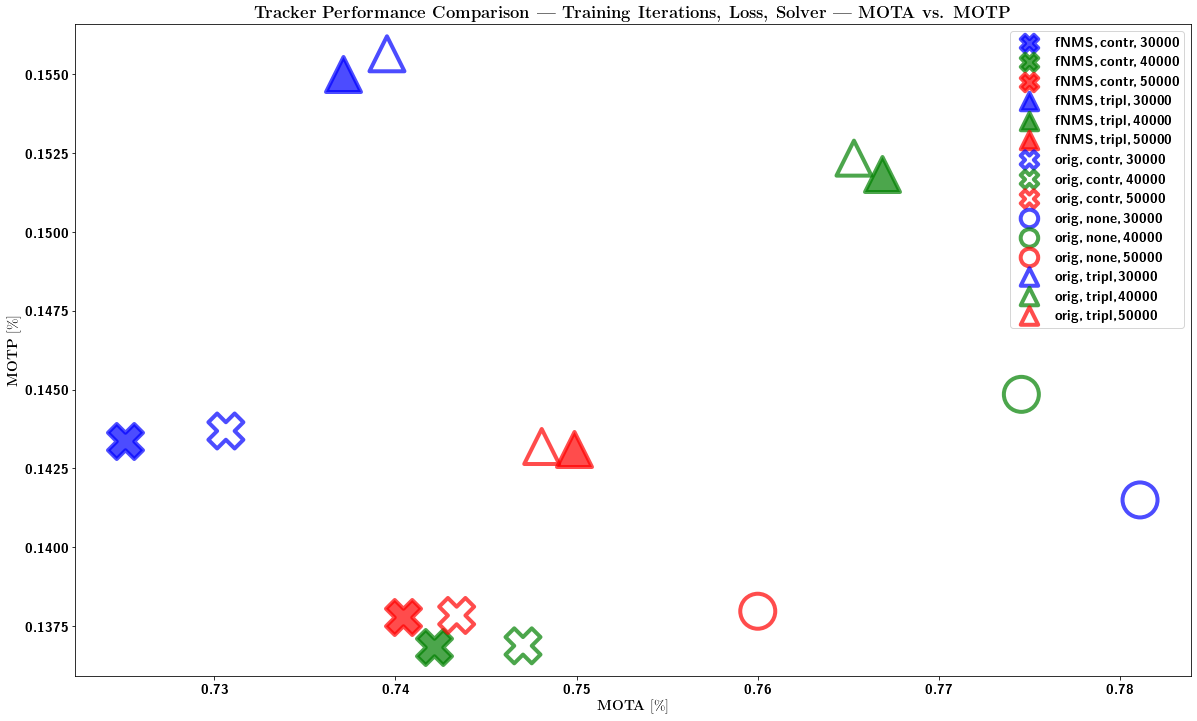

In [21]:
def plot_tracker_loss_solver_comparison(
    df, x_col, y_col, x_label, y_label, x_units='\%', y_units='\%'
):
    def _build_axis_label(text, units=None):
        label = rf'$\textbf{{{text}}}$'
        if units is not None:
            label += f' [{units}]'
        return label

    fig, ax = plt.subplots(figsize=(20, 12), nrows=1, ncols=1)

    base_colors =  list(mcolors.BASE_COLORS.keys())
    unique_models = df['model'].unique().tolist()

    size = 35 ** 2
    for solver, group_solver_df in df.groupby(['solver']):
        if solver == 'orig':
            facecolors = 'none'
        else:
            facecolors = edgecolors = None
        
        for loss, group_loss_df in group_solver_df.groupby(['loss']):
            if loss == 'none':
                marker = 'o'
            elif loss == 'contr':
                marker = 'X'
            else:  # triplet
                marker = '^'
        
            for model, group_model_df in group_loss_df.groupby(['model']):
                xs, ys = group_model_df[x_col], group_model_df[y_col]    
                
                curr_color = base_colors[unique_models.index(model)]
                label = rf'${solver}, {loss}, {str(int(model))}$'
                if facecolors == 'none':
                    color = None
                    edgecolors = curr_color
                else:
                    color = curr_color
                
                ax.scatter(
                    xs, ys, s=size, c=color, label=label, marker=marker,
                    facecolors=facecolors, edgecolors=edgecolors, linewidth=4,
                    alpha=0.7
                )
    
    x_label_formatted = _build_axis_label(x_label, x_units)
    y_label_formatted = _build_axis_label(y_label, y_units)
    
    ax.set_title(
        r'$\textbf{Tracker Performance Comparison --- ' + 
        rf'Training Iterations, Loss, Solver --- {x_label} vs. {y_label}}}$'
    )
    ax.set_xlabel(x_label_formatted)
    ax.set_ylabel(y_label_formatted)
    ax.legend(loc='best', markerscale=0.5, fontsize=14)

    return fig

fig_mota_motp = plot_tracker_loss_solver_comparison(
    df, 'mota', 'motp', 'MOTA', 'MOTP'
)
fig_mota_motp.savefig('tracker_cmp_plot_mota_motp.png', dpi=300)

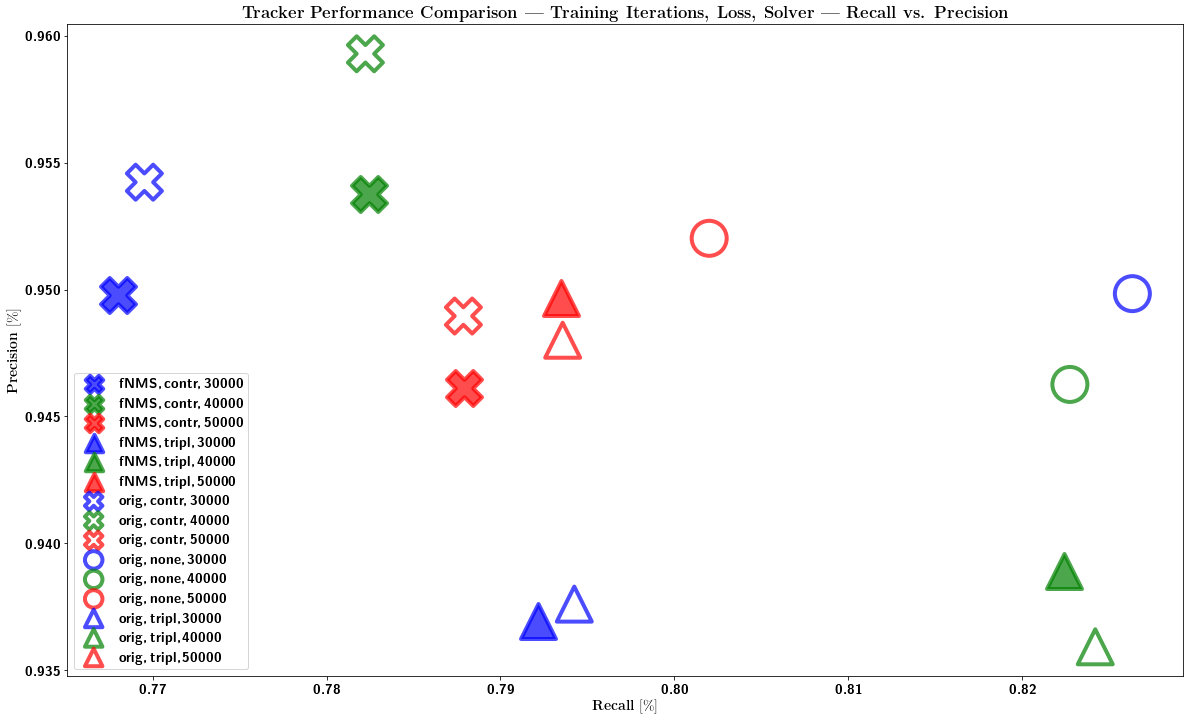

In [23]:
fig_rec_prec = plot_tracker_loss_solver_comparison(
    df, 'recall', 'precision', 'Recall', 'Precision'
)
fig_rec_prec.savefig('tracker_cmp_plot_rec_prec.png', dpi=300)